In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import bs4
import urllib.request
from collections import Counter
import requests
from scipy import stats
from math import sqrt 

In [33]:
#1. loading and printing images

images = []
for i in range(1,6):
    images.append(mpimg.imread(f'img{i}.jpeg'))
    print(images[i-1][54])

[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [250 250 250]
 [253 253 253]
 [255 255 255]
 [255 255 255]
 [252 252 252]
 [255 255 255]
 [217 217 217]
 [111 111 111]
 [  0   0   0]
 [  0   0   0]
 [  3   3   3]
 [ 15  15  15]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  2   2   2]
 [  2   2   2]
 [  2   2   2]
 [  2   2   2]
 [  2   2   2]
 [  2   2   2]
 [  2   2   2]
 [  2   2   2]
 [  2   2   2]
 [ 14  14  14]
 [  0   0   0]
 [  1   1   1]
 [ 11  11  11]
 [  2   2   2]
 [ 24  24  24]
 [135 135 135]
 [253 253 253]
 [243 243 243]
 [255 255 255]
 [252 252 252]
 [245 245 245]
 [255 255 255]
 [251 251 251]
 [255 255 255]
 [255 255 255]
 [250 250 250]
 [252 252 252]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 250 255]
 [253 255 235]
 [250 255 254]
 [252 255 239]
 [254 242 255]
 [246 217 211]
 [241 219  35]
 [247 213   4]
 [255 194   7]
 [246 207  28]
 [228 212 

In [34]:
#showimage = Image.fromarray(images[0], 'RGB')
#showimage.show()

#for displaying an image

In [41]:
#2. extracting mean, variance, and the channels
# computing 0 mean and unit variance

imagesR, imagesG, imagesB = [],[],[]
meanR, meanG, meanB = [],[],[]
varR, varG, varB = [],[],[]

means = []
variances = []
i = 0
for image in images:
    imagesR.append(np.array(image[:,:,0]))
    imagesG.append(np.array(image[:,:,1]))
    imagesB.append(np.array(image[:,:,2]))
    meanR.append(np.mean(imagesR[i]))
    meanG.append(np.mean(imagesG[i]))
    meanB.append(np.mean(imagesB[i]))
    varR.append(np.var(imagesR[i]))
    varG.append(np.var(imagesG[i]))
    varB.append(np.var(imagesB[i]))
    print(varR)
    print(stats.zscore(imagesR[i]))
    print(stats.zscore(imagesG[i]))
    print(stats.zscore(imagesB[i]))

    i=i+1


[6237.881820678711]
[[0.22910725 0.15785468 0.19595268 ... 0.16771195 0.22008019 0.22508102]
 [0.22910725 0.15785468 0.19595268 ... 0.16771195 0.22008019 0.22508102]
 [0.22910725 0.15785468 0.19595268 ... 0.16771195 0.22008019 0.22508102]
 ...
 [0.22910725 0.15785468 0.19595268 ... 0.16771195 0.22008019 0.22508102]
 [0.22910725 0.15785468 0.19595268 ... 0.16771195 0.22008019 0.22508102]
 [0.22910725 0.15785468 0.19595268 ... 0.16771195 0.22008019 0.22508102]]
[[0.22910725 0.15785468 0.19595268 ... 0.16771195 0.22008019 0.22508102]
 [0.22910725 0.15785468 0.19595268 ... 0.16771195 0.22008019 0.22508102]
 [0.22910725 0.15785468 0.19595268 ... 0.16771195 0.22008019 0.22508102]
 ...
 [0.22910725 0.15785468 0.19595268 ... 0.16771195 0.22008019 0.22508102]
 [0.22910725 0.15785468 0.19595268 ... 0.16771195 0.22008019 0.22508102]
 [0.22910725 0.15785468 0.19595268 ... 0.16771195 0.22008019 0.22508102]]
[[0.22910725 0.15785468 0.19595268 ... 0.16771195 0.22008019 0.22508102]
 [0.22910725 0.1578

In [ ]:
#3. download webpage

webpage=str(urllib.request.urlopen('https://blog.keras.io/the-future-of-deep-learning.html').read())
soup = bs4.BeautifulSoup(webpage)

print(soup.get_text())

In [ ]:
#3. frequency of letters

LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
letterCount = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'J': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'O': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'U': 0, 'V': 0, 'W': 0, 'X': 0, 'Y': 0, 'Z': 0}

for letter in soup.get_text().upper():
    if letter in LETTERS:
        letterCount[letter] += 1

char_freq= dict(Counter(soup.get_text()))
#print(plt.bar(list(char_freq.keys()), char_freq.values()))
print(plt.bar(list(letterCount.keys()), letterCount.values()))


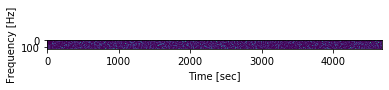

In [77]:
#4. download sound file
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('soundfile.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

spectrogram
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()